<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/informe_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion del problema

Entrada: Un grafo coo los bordes y sus respectivos pesos y un vértice src.

Salida: una matriz donde cada índice denota la longitud de ruta más corta entre ese vértice y el vértice src.

# Descripcion del algoritmo


1.   En este paso, declararíamos una matriz de tamaño V (Número de vértices) digamos dis[] e inicializaríamos con todos sus índices con un Valor muy grande (preferiblemente INT_MAX) excepto src que se inicializará con el valor 0. Estamos haciendo esto porque inicialmente asumimos que lleva un tiempo infinito llegar a cualquiera de los vértices de nuestro vértice de origen y estamos inicializando dis[src]=0 porque ya estamos en el vértice de origen.

2.   En este paso, se calcula la distancia más corta. Para ello, haríamos el paso subyacente V-1 veces. Para cada arista u→v hacer dis[v]=min(dis[u]+ wt de arista u→v, dis[v]) Esto significa que cada vez que estemos en cualquier vértice u comprobaremos si podemos alcanzar alguno de sus vecinos en menos tiempo que actualmente es posible visitar, actualizaremos el dis[v] a dis[u]+wt del borde u→v.

1.   En este paso, verificaremos si existe un ciclo de peso de borde negativo que atraviese todos y cada uno de los bordes u→v y verificaremos si existe dis[u] + wt del borde u→v < dis[v], entonces nuestro gráfico contiene un valor negativo ciclo de peso de borde porque atravesar los bordes una y otra vez es beneficioso ya que reduce el costo de recorrer el gráfico.






# Generadores de instancias

In [ ]:
import random
import networkx as nx

### Generadores de instancia ###

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_b(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_b(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_b(n)

    return graph, graph[0][0]

def instance_generator_d(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_d(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_d(n)

    return graph, graph[0][0]

##Conversión de grafo al formato "networkx"##
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [ ]:
def bellmanFord(V, src, edges, verbose=False, visualize=False):
 
  dis = [99999999] * edges
  dis[src] = 0 
  if verbose == True: print(f"Se inicializa la lista de distancias: {dis}")
  if visualize == True:
    G_to_networkx = graph_to_nxdigraph(V, edges) #Se transforma nuestro grafo a uno compatible con la libreria networkx
    pos=nx.spring_layout(G_to_networkx)
    labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
    #Con ayuda de los comandos proveídos por networkx, mostramos en pantalla el grafo en el que se está trabajando
    nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
    nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

  if verbose == True: print("\n Recorremos todos los arcos del grafo")
  for i in range(edges-1):
    if verbose == True: 
      print(f"Iteración {i+1}")
    for u, v, wt in V:
      if dis[u] != 99999999 and dis[u] + wt < dis[v]:
        dis[v] = dis[u] + wt
        if verbose == True: print(f"Nuevo camino más corto entre {src} y {v}! --> {dis[v]}")
  
  if verbose == True: print("Se buscan ciclos negativos")
  for u, v, wt in V:
    if dis[u] != 99999999 and dis[u] + wt < dis[v]:   
      if verbose == True: print(f"Se encontro un ciclo negativo se muestra un mensaje y se retorna una lista de distancias vacias")
      print("EL GRAFO POSEE UN CICLO NEGATIVO")  
      return []

  if verbose==True: print("\nNo se encontraron ciclos negativos se retorna una lista con las distancias")   
  print("Distancia de cada vértice desde la fuente:")
  for i in range(len(dis)):
   print("{0}\t\t{1}".format(i, dis[i]))
  
  return dis

# Ejemplo con funcion verbose

In [ ]:
n_bellman = random.randint(5,25)
G_bellman, fuente_bellman = instance_generator_b(n_bellman)

print("entrada:",G_bellman)

d=bellmanFord(G_bellman, fuente_bellman, n_bellman, verbose = True, visualize  = False)


entrada: [(3, 18, 29), (3, 24, 35), (2, 19, 95), (2, 5, 97), (24, 8, 37), (24, 10, 48), (10, 2, 98), (10, 22, 60), (10, 21, 79), (12, 0, 38), (12, 6, 33), (21, 14, 62), (21, 8, 4), (17, 6, 69), (17, 15, 47), (17, 13, 13), (9, 23, 83), (9, 15, 67), (19, 14, 72), (23, 14, 81), (23, 10, 13), (23, 12, 80), (16, 4, 35), (16, 13, 49), (16, 17, 22), (1, 20, 45), (1, 19, 83), (4, 3, 36), (4, 6, 1), (0, 5, 74), (7, 2, 67), (7, 10, 55), (11, 9, 72), (11, 18, 41), (15, 5, 16), (8, 6, 86), (8, 1, 75), (5, 9, 35), (20, 17, 44), (20, 24, 36), (20, 2, 98), (6, 22, 5), (6, 19, 83), (6, 16, 98), (22, 7, 57), (22, 4, 8), (22, 14, 13), (14, 0, 7), (14, 13, 4), (13, 20, -8), (13, 7, 75), (13, 0, 16), (18, 10, 84), (2, 11, -22)]
Se inicializa la lista de distancias: [99999999, 99999999, 99999999, 0, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999]


# Ejemplo con funcion visualize

entrada: [(5, 9, 92), (1, 0, 73), (1, 10, 14), (1, 8, 58), (6, 3, 20), (7, 11, 99), (7, 12, 63), (9, 0, 38), (9, 8, 20), (9, 2, 58), (11, 6, 24), (11, 1, 93), (10, 7, 90), (0, 11, 82), (2, 11, 85), (3, 9, 17), (3, 12, 66), (3, 10, 80), (8, 0, 81), (8, 11, 76), (8, 3, 54), (12, 10, 22), (12, 11, 15), (4, 10, 100), (4, 9, 88), (4, 11, 68), (8, 5, 89), (6, 4, 57)]
Distancia de cada vértice desde la fuente:
0		130
1		281
2		150
3		166
4		269
5		0
6		212
7		336
8		112
9		92
10		246
11		188
12		232


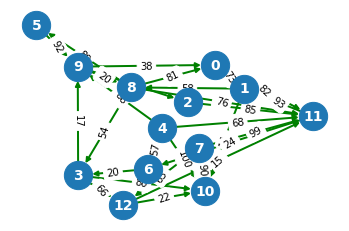

In [ ]:
n_bellman = random.randint(5,25)
G_bellman, fuente_bellman = instance_generator_b(n_bellman)

print("entrada:",G_bellman)

d=bellmanFord(G_bellman, fuente_bellman, n_bellman, verbose = False, visualize  = True)

In [35]:
def minDistance(edges, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(edges-1):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
def dijkstra(V, src,edges):
 
        dist = [1e7] * edges
        dist[src] = 0
        sptSet = [False] * edges
 
        for cout in range(edges-1):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = minDistance(edges,dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(edges-1):
                if (V[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + V[u][v]):
                    dist[v] = dist[u] + V[u][v]
 
        print("Distancia de cada vértice desde la fuente:")
        for i in range(len(dist)):
          print("{0}\t\t{1}".format(i, dist[i]))
        return dist  

In [37]:
n_d = random.randint(5,25)
G_d, d = instance_generator_d(n_d)

b=dijkstra(G_d,d,n_d)

IndexError: ignored

# Análisis de complejidad de Bellman Ford

## Complejidad del tiempo
  Dado que estamos recorriendo todos los bordes V-1 veces, y cada vez estamos recorriendo todos los vértices E , por lo tanto, la complejidad del tiempo es O(VE) .

## Complejidad espacial
  Como estamos usando un arreglo auxiliar dis de tamaño V , la complejidad del espacio es O(V) .

  Donde V y E son números de vértices y aristas respectivamente.


# Complejidad del tiempo del algoritmo de Dijkstra
La complejidad temporal del algoritmo de Dijkstra es
O(V^2) donde V es el número de vértices en el gráfico.

# Correctitud

Teorema:Después de la iteración i de Bellman-Ford, v.  d es como máximo el peso de cada camino de s a v usando como máximo i aristas, para todo v E V.

Prueba:Por inducción en i .  
- Antes de la iteración i , v .  d ≤ min { w ( p ) : ( p≤i - 1 } 
- la relajacion solo disminuye v . d's ⇒ sigue siendo cierto 
- La iteración i considera todos los caminos con ≤ i bordes al relajar los bordes entrantes de v.